## 📍 Libraries & Dataset


This example is based on the famous `gapminder` dataset. It provides the average life expectancy, gdp per capita and population size for more than 100 countries. It is available online [here](https://www.gapminder.org/data/) and I've stored a copy on the gallery [github repo](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/gapminderData.csv)


Let's load it in python and have a look to the 3 first rows.


In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/gapminderData.csv')
data['continent'] = pd.Categorical(data['continent'])
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


## 💭 Bubble chart


Let's build a bubble chart for the first year of the dataset (1952). If you're interested in how to make bubble charts with python, the gallery has a [dedicated section](https://python-graph-gallery.com/bubble-plot/) for it.


Let's build one using the `scatter()` function of `matplotlib`:


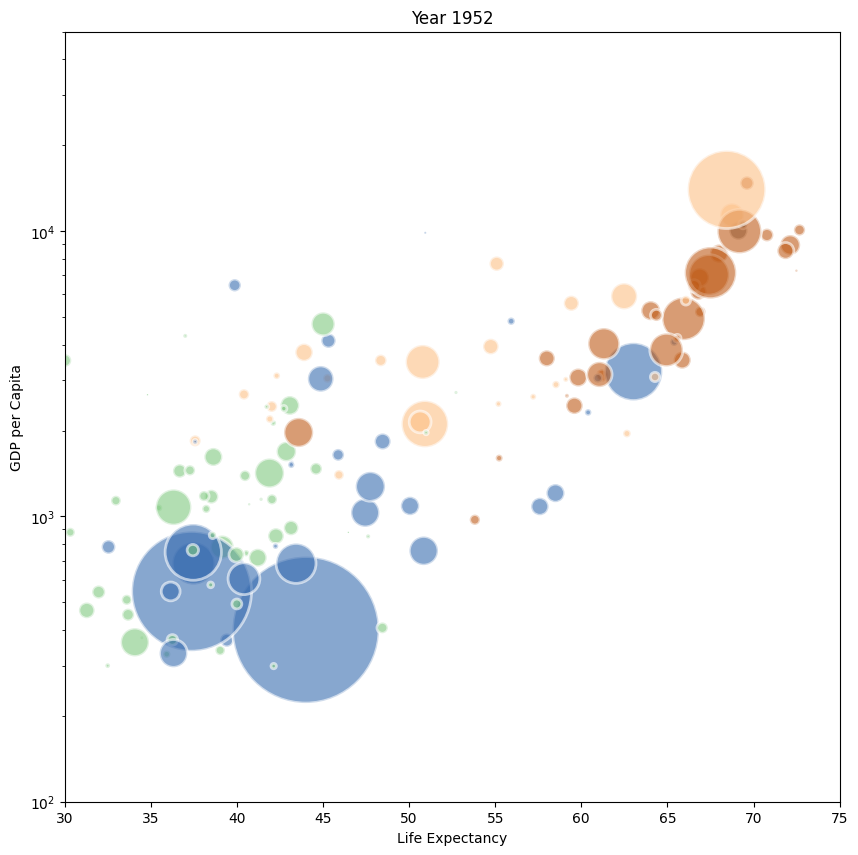

In [2]:
fig, ax = plt.subplots(figsize=(10, 10))

# Subset of the data for year 1952
data1952 = data[data.year == 1952]

# Scatterplot
ax.scatter(
    x = data1952['lifeExp'], 
    y = data1952['gdpPercap'], 
    s = data1952['pop']/50000, 
    c = data1952['continent'].cat.codes, 
    cmap = "Accent", 
    alpha = 0.6, 
    edgecolors = "white", 
    linewidth = 2
)
 
# Add titles (main and on axis)
plt.yscale('log')
ax.set_xlabel("Life Expectancy")
ax.set_ylabel("GDP per Capita")
ax.set_title("Year 1952")
ax.set_ylim(100,50000)
ax.set_xlim(30, 75)

plt.show()

## 🎥 Animation


An animation is basically a set of static images visualized one after the other.

Fortunately, `matplotlib` has a built-in function to create animations: `FuncAnimation`. It requires a **figure** and a function to **update** the figure at each iteration.

The core of the animation is made via the `update()` function that will be called at each iteration. It will update the position of the bubbles according to the year of the dataset. What we have to do is to **subset our dataset** for each year, and update the position of the bubbles accordingly.


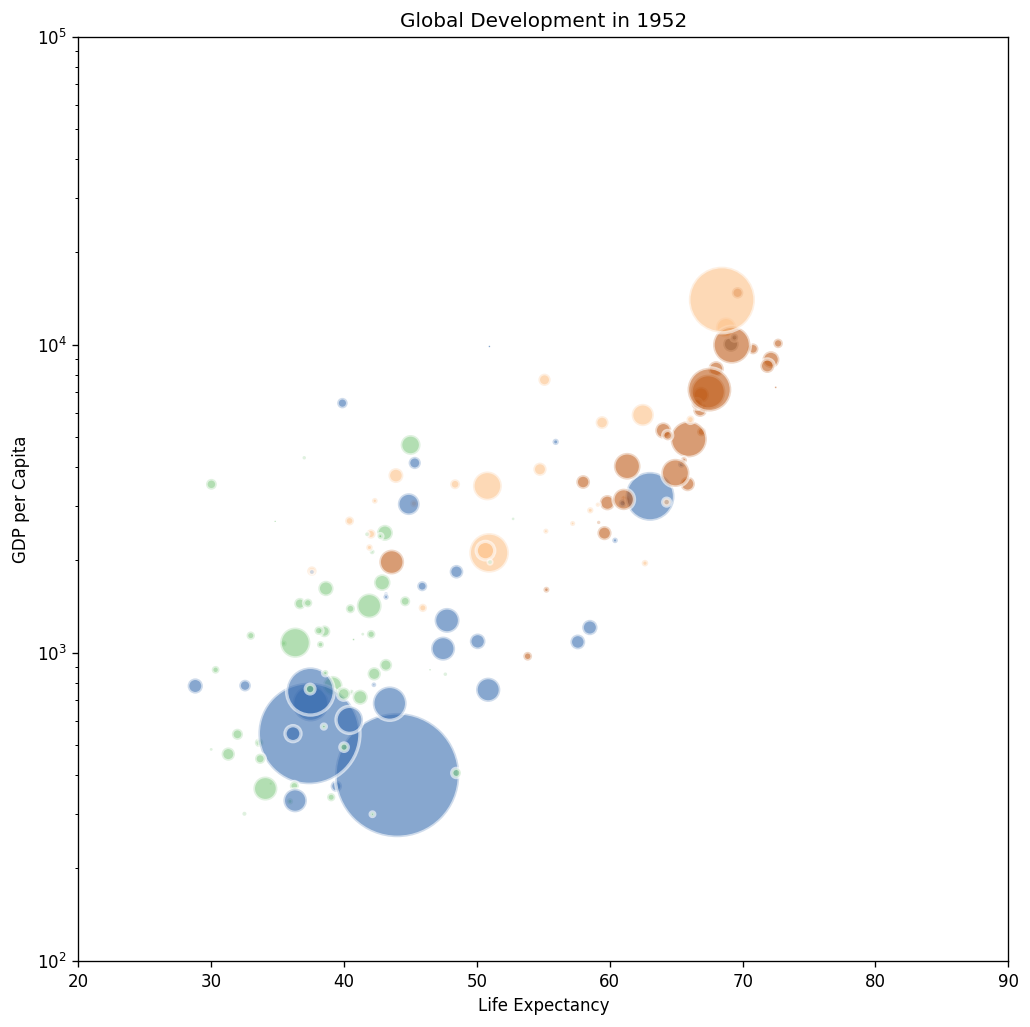

In [3]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=120)

def update(frame):
    # Clear the current plot to redraw
    ax.clear()
    
    # Filter data for the specific year
    yearly_data = data.loc[data.year == frame, :]

    # Scatter plot for that year
    ax.scatter(
        x=yearly_data['lifeExp'], 
        y=yearly_data['gdpPercap'], 
        s=yearly_data['pop']/100000,
        c=yearly_data['continent'].cat.codes, 
        cmap="Accent", 
        alpha=0.6, 
        edgecolors="white", 
        linewidths=2
    )

    # Updating titles and layout
    ax.set_title(f"Global Development in {frame}")
    ax.set_xlabel("Life Expectancy")
    ax.set_ylabel("GDP per Capita")
    ax.set_yscale('log')
    ax.set_ylim(100, 100000)
    ax.set_xlim(20, 90)

    return ax

ani = FuncAnimation(fig, update, frames=data['year'].unique())
ani.save('../../static/animations/gapminder-1.gif', fps=1)

![](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/animations/gapminder-1.gif)


You now know how to create a simple animation with matplotlib!


## Smooth animation

The previous animation is a bit rough. We can make it smoother by interpolating the position of the bubbles between two years. This can be done by the `interpolate()` function of the `pandas` library.

The code for the animation stays the same, but we have to update our dataframe before the animation. Let's do it:


In [4]:
interp_data = pd.DataFrame()

multiple = 10
for country in data['country'].unique():
   
   # prepare a temporary dataframe and subset
   temp_df = pd.DataFrame()
   country_df = data[data['country']==country]

   # interpolate the data
   years = np.linspace(country_df['year'].min(), country_df['year'].max(), len(country_df) * multiple-(multiple-1))
   pops = np.linspace(country_df['pop'].min(), country_df['pop'].max(), len(country_df) * multiple-(multiple-1))
   lifeExps = np.linspace(country_df['lifeExp'].min(), country_df['lifeExp'].max(), len(country_df) * multiple-(multiple-1))
   gdps = np.linspace(country_df['gdpPercap'].min(), country_df['gdpPercap'].max(), len(country_df) * multiple-(multiple-1))
   continents = [country_df['continent'].values[0]] * len(years)

   # add the data to the temporary dataframe
   temp_df['year'] = years
   temp_df['pop'] = pops
   temp_df['lifeExp'] = lifeExps
   temp_df['gdpPercap'] = gdps
   temp_df['continent'] = continents
   temp_df['country'] = country

   # append the temporary dataframe to the final dataframe
   interp_data = pd.concat([interp_data, temp_df])
   interp_data['continent'] = pd.Categorical(interp_data['continent'])

interp_data.head()

,year,pop,lifeExp,gdpPercap,continent,country
0,1952.0,8.425333e+06,28.801000,635.341351,Asia,Afghanistan
1,1952.5,8.638647e+06,28.937609,638.456534,Asia,Afghanistan
2,1953.0,8.851962e+06,29.074218,641.571716,Asia,Afghanistan
3,1953.5,9.065276e+06,29.210827,644.686899,Asia,Afghanistan
4,1954.0,9.278591e+06,29.347436,647.802081,Asia,Afghanistan


The following code is almost the same as before: we only change the `fps` parameter of the `FuncAnimation` function to make the animation display more frames per second.

_Note: this can take a bit of time to compute, depending on your computer._


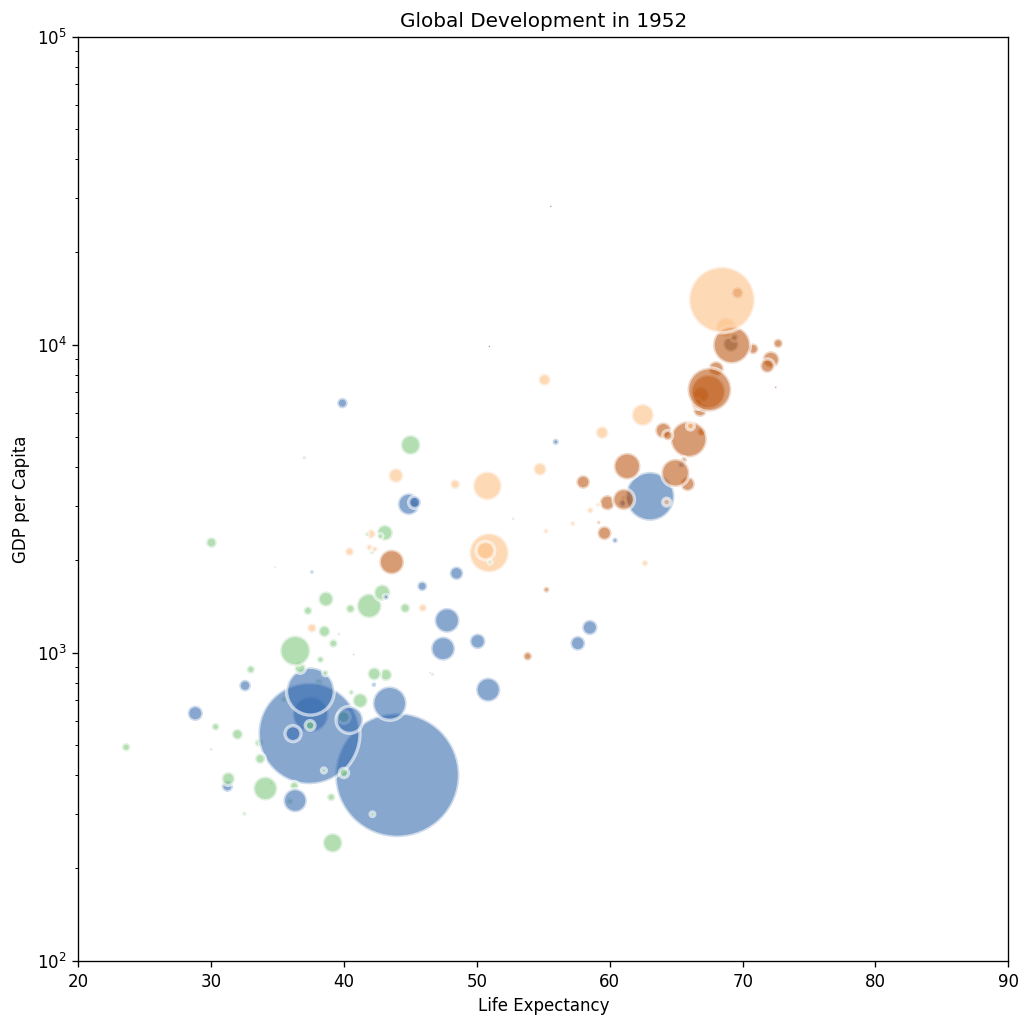

In [5]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=120)

def update(frame):
    # Clear the current plot to redraw
    ax.clear()
    
    # Filter data for the specific year
    yearly_data = interp_data.loc[interp_data.year == frame, :]

    # Scatter plot for that year
    ax.scatter(
        x=yearly_data['lifeExp'], 
        y=yearly_data['gdpPercap'], 
        s=yearly_data['pop']/100000,
        c=yearly_data['continent'].cat.codes, 
        cmap="Accent", 
        alpha=0.6, 
        edgecolors="white", 
        linewidths=2
    )

    # Updating titles and layout
    ax.set_title(f"Global Development in {round(frame)}")
    ax.set_xlabel("Life Expectancy")
    ax.set_ylabel("GDP per Capita")
    ax.set_yscale('log')
    ax.set_ylim(100, 100000)
    ax.set_xlim(20, 90)

    return ax

ani = FuncAnimation(fig, update, frames=interp_data['year'].unique())
ani.save('../../static/animations/gapminder-2.gif', fps=10)

![](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/animations/gapminder-2.gif)


## Going further

If you want to go further, have a look at this [animation with a stacked area chart](/web-animated-line-chart-with-annotation)
